# Credit Risk Evaluator

In [34]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

## Retrieving the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`



In [62]:
# Importing the data
df = pd.read_csv('Resources/lending_data.csv')
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [24]:
#Creating the features DataFrame, X, by removing the loan_status column
X = df.drop('loan_status', axis=1)
#Creating y, the labels set, by using the loan_status column
y = df['loan_status']
print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: loan_status, dtype: int64
Data:    loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   
5    10100.0          7.438            50600        0.407115                4   
6    10300.0          7.490            51100        0.412916                4   
7     8800.0          6.857            45100        0.334812                3   
8     9300.0          7.096            47400        0.367089                3   
9     9700.0          7.248            48800        0.385246              

## Predict Model Performance


By Analysing the difference between the Logistic Regression Model and the Random Forest Classification Model, we can assume that Random Forest Classification Model will have the better performance as:
1.The random forest classifier doesn’t face the overfitting issue because it takes the average of all predictions, canceling out the biases and thus, fixing the overfitting problem.
2.This algorithm offers you relative feature importance that allows you to select the most contributing features for your classifier easily.

## Split the Data into Training and Testing Sets

In [27]:
# Spliting the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create, Fit and Compare Models


In [63]:
# Training a Logistic Regression model and printing the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [32]:
# Training a Random Forest Classifier model and printing the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


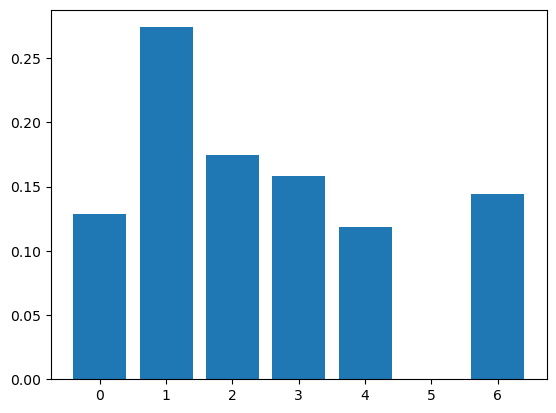

In [33]:
#Finding the most contributing features
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [35]:
#Using SelectFromModel function to eliminate the least contributing features to increase efficiency.
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In [36]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\parka\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [61]:
#Logistic Regression Scores for scaled X-values using the 'balanced' class-weight hyperparameters
clf_1 = LogisticRegression(class_weight='balanced')
clf_1.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf_1.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf_1.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9944455908653185
Testing Score: 0.9937061494015683


In [64]:
#Random Forest Classifier Scores for scaled X-values using the 'balanced' class-weight hyperparameters
clf_2 = RandomForestClassifier(class_weight='balanced')
clf_2.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf_2.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf_2.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9973345714678773
Testing Score: 0.9920553033429633


## Result

From the Traing and Test scores of both the Models we can see that Logistic Regression has better effeciency. 
This has made our assumption incorrect as Logistic Regression Model can also be trained to improve the performance by eliminating the least performing features in our dataset and scaling the values to avoid overfitting.